<a href="https://colab.research.google.com/github/shmilyface/Data-Science/blob/master/MedCab1_Data_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Summary

## Imports

In [58]:
# Imports
import pandas as pd
import numpy as np

!pip install squarify
!pip install category-encoders

# Base
from collections import Counter
import re


# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer
from spacy.matcher import Matcher
import category_encoders as ce
from sklearn.impute import SimpleImputer
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

!python -m spacy download en_core_web_sm

from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_20newsgroups
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import spacy
# Import the English language class
from spacy.lang.en import English

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_sm')


In [59]:
#so more head displays
#override display option
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
!wget https://raw.githubusercontent.com/MedCabinet/ML_Machine_Learning_Files/master/med1.csv
!wget https://raw.githubusercontent.com/MedCabinet/medicalcabinet_api/master/symptoms8_medcab3.csv

--2020-02-03 20:45:33--  https://raw.githubusercontent.com/MedCabinet/ML_Machine_Learning_Files/master/med1.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1267451 (1.2M) [text/plain]
Saving to: ‘med1.csv.3’

med1.csv.3          100%[===================>]   1.21M  --.-KB/s    in 0.06s   

2020-02-03 20:45:33 (21.3 MB/s) - ‘med1.csv.3’ saved [1267451/1267451]

--2020-02-03 20:45:34--  https://raw.githubusercontent.com/MedCabinet/medicalcabinet_api/master/symptoms8_medcab3.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1497841 (1.4M)

In [0]:
df = pd.read_csv('med1.csv')

text = pd.read_csv('med1.csv')


In [61]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative,Energetic,Tingly,Euphoric,Relaxed","Earthy,Sweet,Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed,Aroused,Creative,Happy,Energetic","Flowery,Violet,Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted,Happy,Relaxed,Energetic,Creative","Spicy/Herbal,Sage,Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly,Creative,Hungry,Relaxed,Uplifted","Apricot,Citrus,Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy,Relaxed,Euphoric,Uplifted,Talkative","Citrus,Earthy,Orange","Also known as Kosher Tangie, 24k Gold is a 60%..."


In [0]:
df['Flavor'] = df['Flavor'].str.replace(',', ', ')
df['Effects'] = df['Effects'].str.replace(',', ', ')


In [0]:
text['Flavor'] = text['Flavor'].str.replace(',', ', ')
text['Effects'] = text['Effects'].str.replace(',', ', ')

In [0]:
df['Description'] = df['Description'].str.replace(',', ' ')
text['Description'] = text['Description'].str.replace(',', ' ')
df['Description'] = df['Description'].str.replace(',', ' ')
text['Description'] = text['Description'].str.replace(',', ' ')

In [65]:
df.head()

,Strain,Type,Rating,Effects,Flavor,Description
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...
3,13-Dawgs,hybrid,4.2,"Tingly, Creative, Hungry, Relaxed, Uplifted","Apricot, Citrus, Grapefruit",13 Dawgs is a hybrid of G13 and Chemdawg genet...
4,24K-Gold,hybrid,4.6,"Happy, Relaxed, Euphoric, Uplifted, Talkative","Citrus, Earthy, Orange",Also known as Kosher Tangie 24k Gold is a 60%...


In [66]:
df.dtypes

Strain          object
Type            object
Rating         float64
Effects         object
Flavor          object
Description     object
dtype: object

In [67]:
#Y

df['Strain'].nunique

<bound method IndexOpsMixin.nunique of 0               100-Og
1       98-White-Widow
2                 1024
3             13-Dawgs
4             24K-Gold
             ...      
2346           Zeus-Og
2347          Zkittlez
2348       Zombie-Kush
2349         Zombie-Og
2350          Zoom-Pie
Name: Strain, Length: 2351, dtype: object>

In [0]:
#X

type_data = df['Type']
type_series = pd.Series(type_data)

# making binary feature columns
df['hybrid_type'] = type_series.str.contains('hybrid', regex=False)
df['sativa_type'] = type_series.str.contains('sativa', regex=False)
df['indica_type'] = type_series.str.contains('indica', regex=False)

In [0]:
flavor_data = df['Flavor']
flavor_series = pd.Series(flavor_data)

In [0]:
df['Ammonia_flavor'] = flavor_series.str.contains('Ammonia', regex=False)
df['Apple_flavor'] = flavor_series.str.contains('Apple', regex=False)
df['Apricot_flavor'] = flavor_series.str.contains('Apricot', regex=False)

df['Berry_flavor'] = flavor_series.str.contains('Berry', regex=False)
df['Blue_flavor'] = flavor_series.str.contains('Blue', regex=False)
df['Blueberry_flavor'] = flavor_series.str.contains('Blueberry', regex=False)

df['Citrus_flavor'] = flavor_series.str.contains('Citrus', regex=False)
df['Cheese_flavor'] = flavor_series.str.contains('Cheese', regex=False)
df['Chemical_flavor'] = flavor_series.str.contains('Chemical', regex=False)
df['Chestnut_flavor'] = flavor_series.str.contains('Chestnut', regex=False)

df['Diesel_flavor'] = flavor_series.str.contains('Diesel', regex=False)

df['Earthy_flavor'] = flavor_series.str.contains('Earthy', regex=False)

df['Flowery_flavor'] = flavor_series.str.contains('Flowery', regex=False)
df['Fruit_flavor'] = flavor_series.str.contains('Fruit', regex=False)

df['Grape_flavor'] = flavor_series.str.contains('Grape', regex=False)
df['Grapefruit_flavor'] = flavor_series.str.contains('Grapefruit', regex=False)

df['Honey_flavor'] = flavor_series.str.contains('Honey', regex=False)

df['Lavender_flavor'] = flavor_series.str.contains('Lavender', regex=False)
df['Lemon_flavor'] = flavor_series.str.contains('Lemon', regex=False)

df['Mango_flavor'] = flavor_series.str.contains('Mango', regex=False)
df['Menthol_flavor'] = flavor_series.str.contains('Menthol', regex=False)
df['Mint_flavor'] = flavor_series.str.contains('Mint', regex=False)
df['Minty_flavor'] = flavor_series.str.contains('Minty', regex=False)

df['Nutty_flavor'] = flavor_series.str.contains('Nutty', regex=False)
df['Orange_flavor'] = flavor_series.str.contains('Orange', regex=False)

df['Peach_flavor'] = flavor_series.str.contains('Peach', regex=False)
df['Pepper_flavor'] = flavor_series.str.contains('Pepper', regex=False)
df['Pine_flavor'] = flavor_series.str.contains('Pine', regex=False)
df['Pineapple_flavor'] = flavor_series.str.contains('Pineapple', regex=False)
df['Pungent_flavor'] = flavor_series.str.contains('Pungent', regex=False)

df['Sage_flavor'] = flavor_series.str.contains('Sage', regex=False)
df['Skunk_flavor'] = flavor_series.str.contains('Skunk', regex=False)
df['SpicyHerbal_flavor'] = flavor_series.str.contains('Spicy/Herbal', regex=False)
df['Strawberry'] = flavor_series.str.contains('Strawberry', regex=False)
df['Sweet_flavor'] = flavor_series.str.contains('Sweet', regex=False)

df['Tea_flavor'] = flavor_series.str.contains('Tea', regex=False)
df['Tobacco_flavor'] = flavor_series.str.contains('Tobacco', regex=False)
df['Tree_flavor'] = flavor_series.str.contains('Tree', regex=False)
df['Tropical_flavor'] = flavor_series.str.contains('Tropical', regex=False)

df['Vanilla_flavor'] = flavor_series.str.contains('Vanilla', regex=False)
df['Violet_flavor'] = flavor_series.str.contains('Violet', regex=False)

df['Woody_flavor'] = flavor_series.str.contains('Woody', regex=False)

In [0]:
effect_data = df['Effects']
effect_series = pd.Series(effect_data)

In [0]:
# making binary feature columns
df['Aroused_effect'] = effect_series.str.contains('Aroused', regex=False)

df['Creative_effect'] = effect_series.str.contains('Creative', regex=False)

df['Energetic_effect'] = effect_series.str.contains('Energetic', regex=False)
df['Euphoric_effect'] = effect_series.str.contains('Euphoric', regex=False)



df['Focused_effect'] = effect_series.str.contains('Focused', regex=False)


df['Giggly_effect'] = effect_series.str.contains('Giggly', regex=False)


df['Happy_effect'] = effect_series.str.contains('Happy', regex=False)
df['Hungry_effect'] = effect_series.str.contains('Hungry', regex=False)




df['Relaxed_effect'] = effect_series.str.contains('Relaxed', regex=False)


df['Sleepy_effect'] = effect_series.str.contains('Sleepy', regex=False)


df['Talkative_effect'] = effect_series.str.contains('Talkative', regex=False)
df['Tingly_effect'] = effect_series.str.contains('Tingly', regex=False)



df['Uplifted_effect'] = effect_series.str.contains('Uplifted', regex=False)


df['None_effect'] = effect_series.str.contains('None', regex=False)

In [0]:
df_float = df.replace([True, False],
                    [1.0, 0.0]) 

In [74]:
df_float.head(3)

,Strain,Type,Rating,Effects,Flavor,Description,hybrid_type,sativa_type,indica_type,Ammonia_flavor,Apple_flavor,Apricot_flavor,Berry_flavor,Blue_flavor,Blueberry_flavor,Citrus_flavor,Cheese_flavor,Chemical_flavor,Chestnut_flavor,Diesel_flavor,Earthy_flavor,Flowery_flavor,Fruit_flavor,Grape_flavor,Grapefruit_flavor,Honey_flavor,Lavender_flavor,Lemon_flavor,Mango_flavor,Menthol_flavor,Mint_flavor,Minty_flavor,Nutty_flavor,Orange_flavor,Peach_flavor,Pepper_flavor,Pine_flavor,Pineapple_flavor,Pungent_flavor,Sage_flavor,Skunk_flavor,SpicyHerbal_flavor,Strawberry,Sweet_flavor,Tea_flavor,Tobacco_flavor,Tree_flavor,Tropical_flavor,Vanilla_flavor,Violet_flavor,Woody_flavor,Aroused_effect,Creative_effect,Energetic_effect,Euphoric_effect,Focused_effect,Giggly_effect,Happy_effect,Hungry_effect,Relaxed_effect,Sleepy_effect,Talkative_effect,Tingly_effect,Uplifted_effect,None_effect
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0


In [0]:
text['Flavor_plus'] = ', ' + text['Flavor'].astype(str)
text['Description_plus'] = ', ' + text['Description'].astype(str)
text['Strain_plus'] = ', ' + text['Strain'].astype(str)

text['text_all'] = text['Effects'].map(str) + text['Flavor_plus']
text['text_all'] = text['text_all'].map(str) + text['Description_plus']
text['text_all'] = text['text_all'].map(str) + text['Strain_plus']

df['text_all'] = text['text_all'].map(str) + text['Description_plus']

In [0]:
text['Effects_and_Flavor'] = text['Effects'].map(str) + text['Flavor_plus']

In [0]:
df['Effects_and_Flavor'] = text['Effects'].map(str) + text['Flavor_plus']

In [78]:
text.head(3)

,Strain,Type,Rating,Effects,Flavor,Description,Flavor_plus,Description_plus,Strain_plus,text_all,Effects_and_Flavor
0,100-Og,hybrid,4.0,"Creative, Energetic, Tingly, Euphoric, Relaxed","Earthy, Sweet, Citrus",$100 OG is a 50/50 hybrid strain that packs a ...,", Earthy, Sweet, Citrus",", $100 OG is a 50/50 hybrid strain that packs ...",", 100-Og","Creative, Energetic, Tingly, Euphoric, Relaxed...","Creative, Energetic, Tingly, Euphoric, Relaxed..."
1,98-White-Widow,hybrid,4.7,"Relaxed, Aroused, Creative, Happy, Energetic","Flowery, Violet, Diesel",The ‘98 Aloha White Widow is an especially pot...,", Flowery, Violet, Diesel",", The ‘98 Aloha White Widow is an especially p...",", 98-White-Widow","Relaxed, Aroused, Creative, Happy, Energetic, ...","Relaxed, Aroused, Creative, Happy, Energetic, ..."
2,1024,sativa,4.4,"Uplifted, Happy, Relaxed, Energetic, Creative","Spicy/Herbal, Sage, Woody",1024 is a sativa-dominant hybrid bred in Spain...,", Spicy/Herbal, Sage, Woody",", 1024 is a sativa-dominant hybrid bred in Spa...",", 1024","Uplifted, Happy, Relaxed, Energetic, Creative,...","Uplifted, Happy, Relaxed, Energetic, Creative,..."


In [0]:
df = df.reset_index()
df_float = df_float.reset_index()

df_float['ID'] = df_float['Strain'].index
df_float['ID'] = df_float['ID'].astype(int)

In [80]:
df_float['ID'].isna().sum()

0

In [0]:
np.random.seed(42)

In [0]:
# wrangle & family of variables

target = 'index'
features = ['hybrid_type',	
            'sativa_type',	
            'indica_type',
            'Ammonia_flavor',
            'Apple_flavor',
            'Apricot_flavor',
            'Berry_flavor',
            'Blue_flavor',
            'Blueberry_flavor',
            'Citrus_flavor',
            'Cheese_flavor',
            'Chemical_flavor',
            'Chestnut_flavor',
            'Diesel_flavor',
            'Earthy_flavor',
            'Flowery_flavor',
            'Fruit_flavor',
            'Grape_flavor',
            'Grapefruit_flavor',
            'Honey_flavor',
            'Lavender_flavor',
            'Lemon_flavor',
            'Mango_flavor',
            'Menthol_flavor',
            'Mint_flavor',
            'Minty_flavor',
            'Nutty_flavor',
            'Orange_flavor',
            'Peach_flavor',
            'Pepper_flavor',
            'Pine_flavor',
            'Pineapple_flavor',
            'Pungent_flavor',
            'Sage_flavor',
            'Skunk_flavor',
            'SpicyHerbal_flavor',
            'Strawberry',
            'Sweet_flavor',
            'Tea_flavor',
            'Tobacco_flavor',
            'Tree_flavor',
            'Tropical_flavor',	
            'Vanilla_flavor',
            'Violet_flavor',
            'Woody_flavor',
            'Aroused_effect',
            'Creative_effect',
            'Energetic_effect',
            'Euphoric_effect',
            'Focused_effect',
            'Giggly_effect',
            'Happy_effect',
            'Hungry_effect',
            'Relaxed_effect',
            'Sleepy_effect',
            'Talkative_effect',
            'Tingly_effect',
            'Uplifted_effect',
            'None_effect'
            ]
X_train = df_float[features]
y_train = df_float[target]
X_val = df_float[features]
y_val = df_float[target]

In [0]:
# possible analysis functions

def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [0]:
nlp = spacy.load("en_core_web_sm")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [0]:
# Version 1

# Tokenizer Pipe

tokens = []

""" Make them tokens """
for doc in tokenizer.pipe(df['text_all'], batch_size=100):
    doc_tokens = [token.text for token in doc]
    tokens.append(doc_tokens)

df['tokens'] = tokens

In [86]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
56,,2177,17894,1.0,0.046203,0.046203,0.925989
25,and,2232,14656,2.0,0.037842,0.084046,0.949383
12,a,2188,12242,3.0,0.031609,0.115655,0.930668
60,the,1898,9644,4.0,0.024901,0.140556,0.807316
24,of,1968,9136,5.0,0.023590,0.164146,0.837091


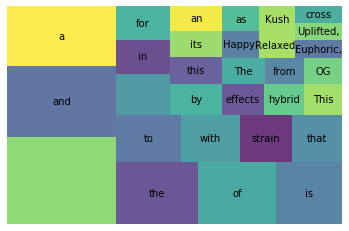

In [87]:


wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
# Version 2

tokens = []

""" Update those tokens w/o stopwords"""
for doc in tokenizer.pipe(df['text_all'], batch_size=100):
    
    doc_tokens = []
    
    for token in doc:
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [89]:
# Using the "Count" function
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
38,,2177,17894,1.0,0.070444,0.070444,0.925989
15,strain,1598,4680,2.0,0.018424,0.088868,0.679711
51,,1154,4268,3.0,0.016802,0.105670,0.490855
161,effects,1036,2432,4.0,0.009574,0.115244,0.440664
26,hybrid,1028,2362,5.0,0.009299,0.124543,0.437261


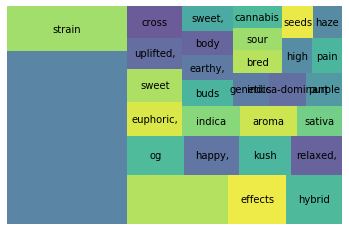

In [90]:
wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
STOP_WORDS = nlp.Defaults.stop_words.union(['strain',
                                            'effects',
                                            'effects,',
                                            'buds',
                                            'known',
                                            'genetics',
                                            'bred',
                                            '',
                                            ' ',
                                            'like',
                                            'notes',
                                            'flavors',
                                            'patients'
                                            ])

In [0]:
# Version 3

tokens = []

""" tokens w/o updated stopwords"""
for doc in tokenizer.pipe(df['text_all'], batch_size=100):
    
    doc_tokens = []
    
    for token in doc:
        if (token.text.lower() not in STOP_WORDS) & (token.is_punct == False):
            doc_tokens.append(token.text.lower())

    tokens.append(doc_tokens)

df['tokens'] = tokens

In [93]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
48,,1154,4268,1.0,0.019135,0.019135,0.490855
25,hybrid,1028,2362,2.0,0.010590,0.029725,0.437261
19,og,466,1944,3.0,0.008716,0.038441,0.198214
47,"happy,",1871,1871,4.0,0.008388,0.046829,0.795832
194,kush,512,1756,5.0,0.007873,0.054702,0.217780


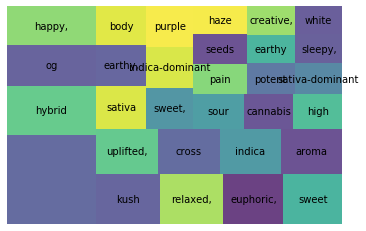

In [94]:
wc_top20 = wc[wc['rank'] <= 30]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

In [0]:
# Import
svd = TruncatedSVD(n_components=100, 
                   algorithm='randomized', 
                   n_iter=10)

In [0]:
params = { 
    'lsi__svd__n_components': [10,100,250],
    # these are percents 90% 95% 100%
    'lsi__vect__max_df':[.9, .95, 1.0],
    'clf__n_estimators':(5,10,25)
}

In [0]:
# Create Pipeline Components

vect = TfidfVectorizer(stop_words='english')
rfc = RandomForestClassifier()

In [0]:
svd = TruncatedSVD(n_components=10, 
                   algorithm='randomized', 
                   n_iter=2)

In [0]:
vect = TfidfVectorizer(stop_words='english')
clf = RandomForestClassifier()

In [0]:
# LSI
lsi = Pipeline([('vect', vect), ('svd', svd)])

# Pipe
pipe = Pipeline([('lsi', lsi), ('clf', rfc)])

In [101]:
'''
# debugging

# Fit
grid_search = GridSearchCV(pipe,params, cv=4, n_jobs=8, verbose=1)
grid_search.fit(train['Effects'], train['Rating'])
'''
# debugging

"\n# debugging\n\n# Fit\ngrid_search = GridSearchCV(pipe,params, cv=4, n_jobs=8, verbose=1)\ngrid_search.fit(train['Effects'], train['Rating'])\n"

In [0]:
train = df
test = df
val = df

target = ['Strain']
features = ['Effects']

test2_features = ['text_all']

# Arrange data into X features matrix and y target vector 
X_train = train[features]
y_train = train[target]
X_val = val[features]
y_val = val[target]
X_test = test[features]

In [0]:
X_test2 = test[test2_features]

In [104]:
pipeline = make_pipeline(
    ce.OneHotEncoder(use_cat_names=True), 
    #SimpleImputer(strategy='mean'), 
    DecisionTreeClassifier(random_state=42)
)

# Fit on train
pipeline.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('onehotencoder',
                 OneHotEncoder(cols=['Effects'], drop_invariant=False,
                               handle_missing='value', handle_unknown='value',
                               return_df=True, use_cat_names=True, verbose=0)),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                        criterion='gini', max_depth=None,
                                        max_features=None, max_leaf_nodes=None,
                                        min_impurity_decrease=0.0,
                                        min_impurity_split=None,
                                        min_samples_leaf=1, min_samples_split=2,
                                        min_weight_fraction_leaf=0.0,
                                        presort='deprecated', random_state=42,
                                        splitter='best'))],
         verbose=Fals

In [105]:
# Score on train, val
print('Train Accuracy', pipeline.score(X_train, y_train))

Train Accuracy 0.704381114419396


In [0]:
# Create the nlp object


nlp = English()

In [107]:
df.loc[1, 'Description']

'The ‘98 Aloha White Widow is an especially potent cut of White Widow that has grown in renown alongside Hawaiian legends like Maui Wowie and Kona Gold. This White Widow phenotype reeks of diesel and skunk and has a rich earthy taste with intermittent notes of hash. Its buds are coated in trichomes  giving its dark foliage a lustrous glint to go along with its room-filling odor. This one-hitter-quitter uplifts the mind with mind-bending euphoria that materializes in the body as airy relaxation. ‘98 Aloha White Widow is available from Pua Mana 1st Hawaiian Pakalōlō Seed Bank. \xa0'

In [0]:
text1 = df.loc[1, 'Description'] 

In [109]:
# Created by processing a string of text with the nlp object
doc = nlp(text1)

# Iterate over tokens in a Doc
for token in doc:
    print(token.text)

The
‘
98
Aloha
White
Widow
is
an
especially
potent
cut
of
White
Widow
that
has
grown
in
renown
alongside
Hawaiian
legends
like
Maui
Wowie
and
Kona
Gold
.
This
White
Widow
phenotype
reeks
of
diesel
and
skunk
and
has
a
rich
earthy
taste
with
intermittent
notes
of
hash
.
Its
buds
are
coated
in
trichomes
 
giving
its
dark
foliage
a
lustrous
glint
to
go
along
with
its
room
-
filling
odor
.
This
one
-
hitter
-
quitter
uplifts
the
mind
with
mind
-
bending
euphoria
that
materializes
in
the
body
as
airy
relaxation
.
‘
98
Aloha
White
Widow
is
available
from
Pua
Mana
1st
Hawaiian
Pakalōlō
Seed
Bank
.
 


In [110]:
print('Index:   ', [token.i for token in doc])
print('Text:    ', [token.text for token in doc])

print('is_alpha:', [token.is_alpha for token in doc])
print('is_punct:', [token.is_punct for token in doc])
print('like_num:', [token.like_num for token in doc])

Index:    [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113]
Text:     ['The', '‘', '98', 'Aloha', 'White', 'Widow', 'is', 'an', 'especially', 'potent', 'cut', 'of', 'White', 'Widow', 'that', 'has', 'grown', 'in', 'renown', 'alongside', 'Hawaiian', 'legends', 'like', 'Maui', 'Wowie', 'and', 'Kona', 'Gold', '.', 'This', 'White', 'Widow', 'phenotype', 'reeks', 'of', 'diesel', 'and', 'skunk', 'and', 'has', 'a', 'rich', 'earthy', 'taste', 'with', 'intermittent', 'notes', 'of', 'hash', '.', 'Its', 'buds', 'are', 'coated', 'in', 'trichomes', ' ', 'giving', 'its', 'dark', 'foliage', 'a', 'l

In [111]:
# Load the small English model
nlp = spacy.load('en_core_web_sm')

# Process a text
doc = nlp(text1)

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

The DET
‘ ADJ
98 NUM
Aloha PROPN
White PROPN
Widow PROPN
is VERB
an DET
especially ADV
potent ADJ
cut NOUN
of ADP
White PROPN
Widow PROPN
that DET
has VERB
grown VERB
in ADP
renown NOUN
alongside ADP
Hawaiian ADJ
legends NOUN
like ADP
Maui PROPN
Wowie PROPN
and CCONJ
Kona PROPN
Gold PROPN
. PUNCT
This DET
White PROPN
Widow PROPN
phenotype VERB
reeks NOUN
of ADP
diesel NOUN
and CCONJ
skunk NOUN
and CCONJ
has VERB
a DET
rich ADJ
earthy ADJ
taste NOUN
with ADP
intermittent ADJ
notes NOUN
of ADP
hash NOUN
. PUNCT
Its DET
buds NOUN
are VERB
coated VERB
in ADP
trichomes NOUN
  SPACE
giving VERB
its DET
dark ADJ
foliage NOUN
a DET
lustrous ADJ
glint NOUN
to PART
go VERB
along PART
with ADP
its DET
room NOUN
- PUNCT
filling VERB
odor NOUN
. PUNCT
This DET
one NUM
- PUNCT
hitter NOUN
- PUNCT
quitter NOUN
uplifts NOUN
the DET
mind NOUN
with ADP
mind NOUN
- PUNCT
bending VERB
euphoria NOUN
that DET
materializes VERB
in ADP
the DET
body NOUN
as ADP
airy NOUN
relaxation NOUN
. PUNCT
‘ PUNCT
98 NUM


In [112]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

The DET det Widow
‘ ADJ punct Widow
98 NUM nummod Widow
Aloha PROPN compound Widow
White PROPN compound Widow
Widow PROPN nsubj is
is VERB ROOT is
an DET det cut
especially ADV advmod potent
potent ADJ amod cut
cut NOUN attr is
of ADP prep cut
White PROPN compound Widow
Widow PROPN pobj of
that DET nsubj grown
has VERB aux grown
grown VERB relcl cut
in ADP prep grown
renown NOUN pobj in
alongside ADP prep grown
Hawaiian ADJ amod legends
legends NOUN pobj alongside
like ADP prep legends
Maui PROPN compound Wowie
Wowie PROPN pobj like
and CCONJ cc Wowie
Kona PROPN compound Gold
Gold PROPN conj Wowie
. PUNCT punct is
This DET det phenotype
White PROPN compound Widow
Widow PROPN compound phenotype
phenotype VERB compound reeks
reeks NOUN ROOT reeks
of ADP prep reeks
diesel NOUN pobj of
and CCONJ cc diesel
skunk NOUN conj diesel
and CCONJ cc reeks
has VERB conj reeks
a DET det taste
rich ADJ amod taste
earthy ADJ amod taste
taste NOUN dobj has
with ADP prep taste
intermittent ADJ amod notes

In [113]:
for token in doc:
    # Get the token text, part-of-speech tag and dependency label
    token_text = token.text
    token_pos = token.pos_
    token_dep = token.dep_
    # This is for formatting only
    print("{:<12}{:<10}{:<10}".format(token_text, token_pos, token_dep))

The         DET       det       
‘           ADJ       punct     
98          NUM       nummod    
Aloha       PROPN     compound  
White       PROPN     compound  
Widow       PROPN     nsubj     
is          VERB      ROOT      
an          DET       det       
especially  ADV       advmod    
potent      ADJ       amod      
cut         NOUN      attr      
of          ADP       prep      
White       PROPN     compound  
Widow       PROPN     pobj      
that        DET       nsubj     
has         VERB      aux       
grown       VERB      relcl     
in          ADP       prep      
renown      NOUN      pobj      
alongside   ADP       prep      
Hawaiian    ADJ       amod      
legends     NOUN      pobj      
like        ADP       prep      
Maui        PROPN     compound  
Wowie       PROPN     pobj      
and         CCONJ     cc        
Kona        PROPN     compound  
Gold        PROPN     conj      
.           PUNCT     punct     
This        DET       det       
White     

In [114]:
matcher = Matcher(nlp.vocab)

doc = nlp(text1)

# Write a pattern for adjective plus one or two nouns
pattern = [{"POS": 'ADJ'}, 
#           {"POS": 'DET'}, 
           {"POS": 'NOUN', "OP":'+'}]

# Add the pattern to the matcher and apply the matcher to the doc
matcher.add("ADJ_NOUN_PATTERN", None, pattern)
matches = matcher(doc)
print("Total matches found:", len(matches))

# Iterate over the matches and print the span text
for match_id, start, end in matches:
      print("Match found:", doc[start:end].text)

Total matches found: 6
Match found: potent cut
Match found: Hawaiian legends
Match found: earthy taste
Match found: intermittent notes
Match found: dark foliage
Match found: lustrous glint
